<a href="https://colab.research.google.com/github/d-maniatakos/thesis/blob/main/ARIMA_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIMA

## Import Packages

In [197]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt

## Perform ARIMA

In [240]:
def arima_forecast(df, horizon=24, seasonality=12, order=None, seasonal_order=None, single_step = False):
  known_observations = df[:len(df)-horizon]
  ts_with_forecasts = known_observations

  if order is None:
    arima_params = pm.auto_arima(df, error_action='ignore', trace=True, suppress_warnings=True, maxiter=5, seasonal=True, m=seasonality)
    order = arima_params.order 
    seasonal_order = arima_params.seasonal_order

  for i in range(horizon):
    model = ARIMA(known_observations, order=order, seasonal_order=seasonal_order)
    forecast = model.fit().forecast()
    if single_step == True:
      known_observations = df[:len(df)-horizon+i+1]
      ts_with_forecasts = pd.concat([ts_with_forecasts, forecast])
    else:
      known_observations = pd.concat([known_observations, forecast])
      ts_with_forecasts = known_observations

  df.plot()
  ts_with_forecasts[len(known_observations)-horizon:].plot()
  plt.show()

# Experiments

### Air Passengers

In [199]:
df = pd.read_csv('AirPassengers.csv')
df.index = pd.date_range(start='1949-01', end='1961-01', freq='M').to_period('M')
df = df['#Passengers']

df

1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Freq: M, Name: #Passengers, Length: 144, dtype: int64

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1024.414, Time=0.89 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.395, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.096, Time=0.24 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.394, Time=0.06 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1020.928, Time=0.26 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1021.675, Time=0.41 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.397, Time=0.14 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.397, Time=0.13 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.10 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1024.386, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=1022.344, Time=0.14 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 2.907 seconds


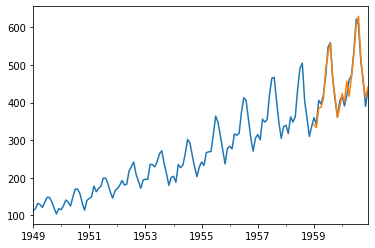

In [200]:
arima_forecast(df, single_step=True)

### Monthly Car Sales

In [201]:
df = pd.read_csv('monthly-car-sales.csv')
df.index = pd.date_range(start='1960-01', end='1969-01', freq='M').to_period('M')
df = df['Sales']
df

1960-01     6550
1960-02     8728
1960-03    12026
1960-04    14395
1960-05    14587
           ...  
1968-08    16722
1968-09    14385
1968-10    21342
1968-11    17180
1968-12    14577
Freq: M, Name: Sales, Length: 108, dtype: int64

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1709.981, Time=0.57 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1710.981, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1704.148, Time=0.29 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1706.662, Time=0.38 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1736.160, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1709.092, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1705.154, Time=0.82 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1706.995, Time=0.40 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1704.115, Time=0.36 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=1704.302, Time=0.70 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=1707.201, Time=0.79 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1707.659, Time=0.30 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=1702.308, Time=0.34 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=1707.758, Time=0.17 sec
 ARIMA(2,0,0)(1,1,1

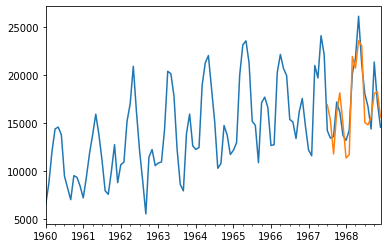

In [202]:
arima_forecast(df, 18, single_step = True)

### Shampoo Sales

In [203]:
df = pd.read_csv('shampoo_sales.csv')
df.index = pd.date_range(start='1990-01', end='1993-01', freq='M').to_period('M')
df = df['Sales']
df

1990-01    266.0
1990-02    145.9
1990-03    183.1
1990-04    119.3
1990-05    180.3
1990-06    168.5
1990-07    231.8
1990-08    224.5
1990-09    192.8
1990-10    122.9
1990-11    336.5
1990-12    185.9
1991-01    194.3
1991-02    149.5
1991-03    210.1
1991-04    273.3
1991-05    191.4
1991-06    287.0
1991-07    226.0
1991-08    303.6
1991-09    289.9
1991-10    421.6
1991-11    264.5
1991-12    342.3
1992-01    339.7
1992-02    440.4
1992-03    315.9
1992-04    439.3
1992-05    401.3
1992-06    437.4
1992-07    575.5
1992-08    407.6
1992-09    682.0
1992-10    475.3
1992-11    581.3
1992-12    646.9
Freq: M, Name: Sales, dtype: float64

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=407.640, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=430.873, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=405.183, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=437.414, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=429.229, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=405.986, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=406.577, Time=0.28 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=405.954, Time=0.17 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=403.955, Time=0.15 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=405.949, Time=0.26 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=408.017, Time=0.32 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=426.929, Time=0.14 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=400.103, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=403.605, Time=0.08 sec
 ARIMA(2,1,0)(1,0,1)[12] intercep

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


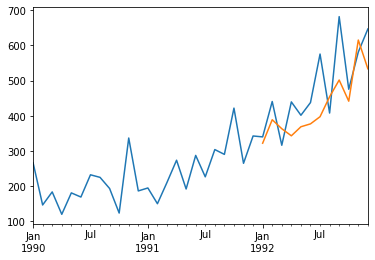

In [204]:
arima_forecast(df, 12, single_step=True)

### UBER Stock

In [225]:
df = pd.read_csv('UBER.csv')
df.index = df['Date']
df = df['Adj Close']
df.index = pd.to_datetime(df.index)
df = df.resample(rule='M').sum()
df.index = pd.date_range(start='2019-05', end='2022-04', freq='M').to_period('M')

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=445.416, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=471.414, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=437.581, Time=0.11 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=456.206, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=573.717, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=437.301, Time=0.06 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=437.789, Time=0.12 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=439.670, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=438.947, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=438.737, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=455.603, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=443.017, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=440.625, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 1.389 seconds


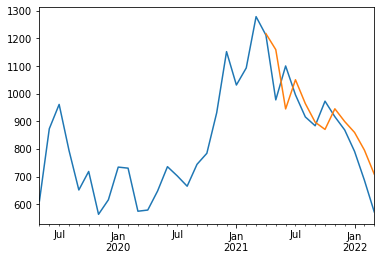

In [226]:
arima_forecast(df, 12, single_step=True)

### Daily Mean Temperatures

In [237]:
df = pd.read_csv('daily-min-temperatures.csv')
df.index = df['Date']
df = df['Temp']
df.index = pd.date_range(start='1981-01-01', end='1990-12-31', freq='D').to_period('D')
df = df[len(df)-1000:]

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=5189.363, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5585.488, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=5074.037, Time=0.33 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=4877.066, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=7802.329, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=5012.866, Time=0.19 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=8269.277, Time=0.37 sec
 ARIMA(0,0,1)(0,0,2)[7] intercept   : AIC=4848.877, Time=0.75 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=8165.031, Time=0.63 sec
 ARIMA(0,0,0)(0,0,2)[7] intercept   : AIC=5238.481, Time=0.72 sec
 ARIMA(1,0,1)(0,0,2)[7] intercept   : AIC=4639.311, Time=0.72 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=4637.414, Time=0.44 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=4644.591, Time=0.21 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=5583.394, Time=0.41 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: 

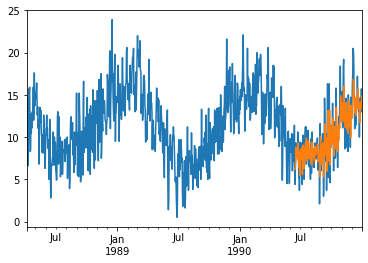

In [241]:
arima_forecast(df = df, horizon = 200, single_step=True, seasonality=7)